Benford’s law can be applied to many situations and is particularly useful in fraud detection. I have downloaded the 2016 US election results for Illinois from [here](https://public.opendatasoft.com/explore/dataset/usa-2016-presidential-election-by-county/export/?disjunctive.state). However, I have edited the file to calculate the votes from the total votes multiplied by the percentages. In this analysis, we are going to examine the Republican votes for Illinois. 

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:

import pandas as pd

downloaded = drive.CreateFile({'id':'1UYnazsiCgB5mQqQ_W5DHCfToepuqwcAx'}) 
downloaded.GetContentFile('illinois_elections.csv')  
df = pd.read_csv('illinois_elections.csv',encoding = "utf-8")
print(df.head())

                       County  Precincts  ...  Rep_votes  Dem_Votes
0     Grundy County, Illinois         40  ...      13417       8021
1     Shelby County, Illinois         33  ...       8209       2279
2     Saline County, Illinois         28  ...       8248       2551
3  Winnebago County, Illinois        197  ...      53922      52595
4     DuPage County, Illinois        869  ...     164355     222499

[5 rows x 11 columns]


We are going to import the relevant libraries. 

In [0]:
import numpy as np
import pandas as pd
import sys
import math
import matplotlib.pyplot as plt

In this piece of code(Towards Science) we count the first digit. 

In [0]:
def count_first_digit(data_str):
    mask=df[data_str]>1.
    data=list(df[mask][data_str])
    for i in range(len(data)):
        while data[i]>10:
            data[i]=data[i]/10
    first_digits=[int(x) for x in sorted(data)]
    unique=(set(first_digits))#a list with unique values of     first_digit list
    data_count=[]
    for i in unique:
        count=first_digits.count(i)
        data_count.append(count)
    total_count=sum(data_count)
    data_percentage=[(i/total_count)*100 for i in data_count]
    return  total_count,data_count, data_percentage
# Benford's Law percentages for leading digits 1-9
BENFORD = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

total_count,data_count, data_percentage=count_first_digit('Rep_votes')

Now we implement a $\chi^2$ test to determine if there is a significant difference between the actual results and the expected results. We also plot the expected against the actual counts in a bar chart.

Actual counts  [34, 10, 8, 16, 14, 5, 4, 7, 4]
Expected counts  [31, 18, 13, 10, 8, 7, 6, 5, 5]

Chi-squared Test Statistic = 16.107
Critical value at a P-value of 0.05 is 15.51.


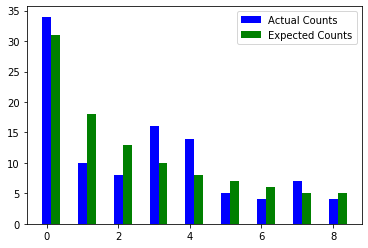

False

In [0]:
def get_expected_counts(total_count):
    """Return list of expected Benford's Law counts for total sample count."""
    return [round(p * total_count / 100) for p in BENFORD]
expected_counts=get_expected_counts(total_count)
def chi_square_test(data_count,expected_counts):
    """Return boolean on chi-square test (8 degrees of freedom & P-val=0.05)."""
    chi_square_stat = 0  # chi square test statistic
    for data, expected in zip(data_count,expected_counts):

        chi_square = math.pow(data - expected, 2)

        chi_square_stat += chi_square / expected
    print("Actual counts ", data_count)
    print("Expected counts ", expected_counts)
    print("\nChi-squared Test Statistic = {:.3f}".format(chi_square_stat))
    print("Critical value at a P-value of 0.05 is 15.51.") 
    X = np.arange(9)
    category=['Actual Counts','Expected Counts']
    plt.bar(X + 0.00, data_count, color = 'b', width = 0.25)
    plt.bar(X + 0.25, expected_counts, color = 'g', width = 0.25) 
    plt.legend(category,loc=1)
    plt.show()   
    return chi_square_stat < 15.51
chi_square_test(data_count,expected_counts)

What do these results tell us. Well the fact that we got a False result implies we cannot accept the null hypothesis. This tells us that there may be evidence that there was unusual behaviour in the elections (this differs to the results found by Towards Science). I will say that it is only marginally significant and this could be down to the fact that we have only used 103 counties in the analysis, as we are at the low end of what is expected for a Benford analysis.  



Complete this analysis for the full US generall election. Talk amongst yourselves and see if you think the election results seem to be fair.

---



Let us know in the comments section on Futurelearn [here]( https://www.futurelearn.com/courses/pre-processing-data-and-feature-impact-calculation/1/steps/687977).